<a href="https://colab.research.google.com/github/karthzzz/titanic_survival_prediction/blob/master/P1_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
url = "https://www.kaggle.com/datasets/brendan45774/test-file/download?datasetVersionNumber=6"
titanic_data = pd.read_csv("tested.csv")
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

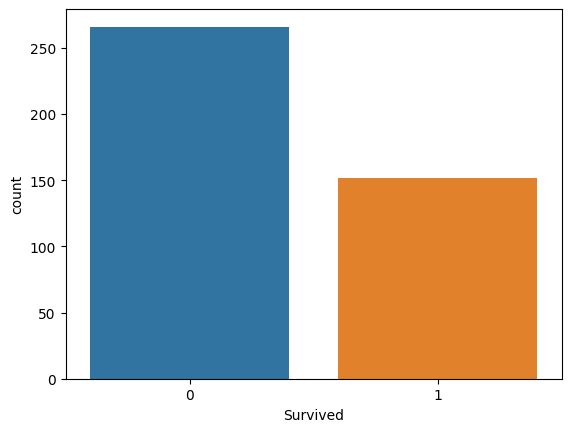

In [ ]:
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

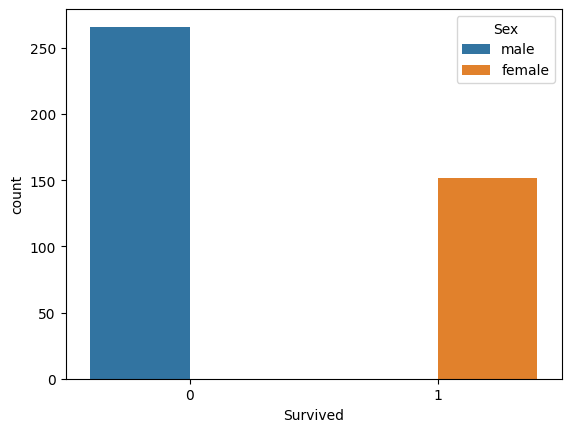

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

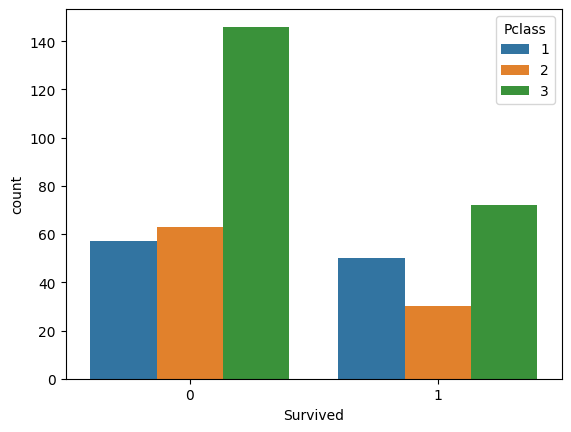

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

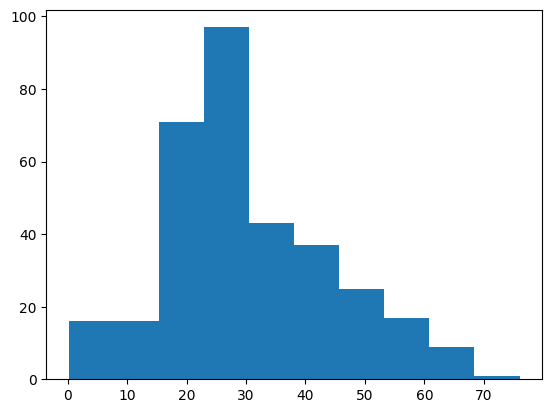

In [ ]:
plt.hist(titanic_data['Age'].dropna())

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

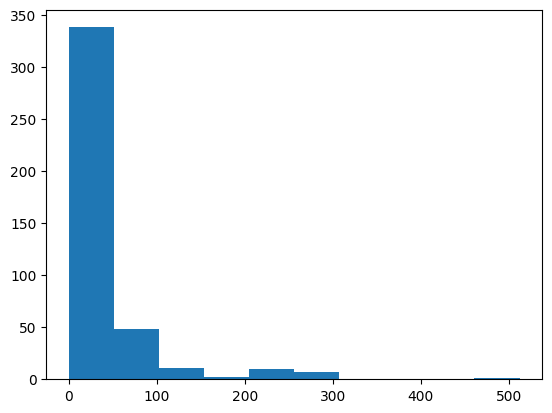

In [ ]:
plt.hist(titanic_data['Fare'])

In [ ]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

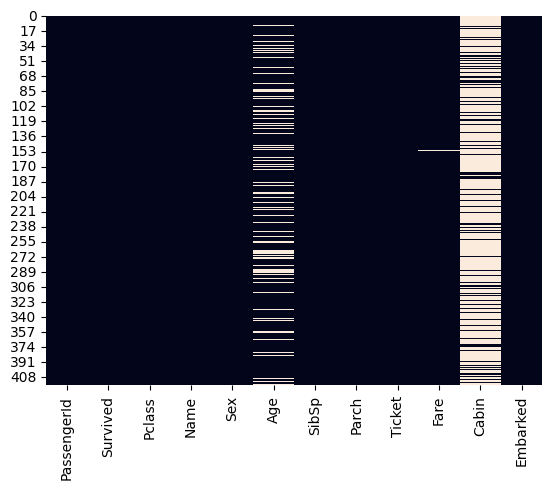

In [ ]:
sns.heatmap(titanic_data.isnull(), cbar=False)

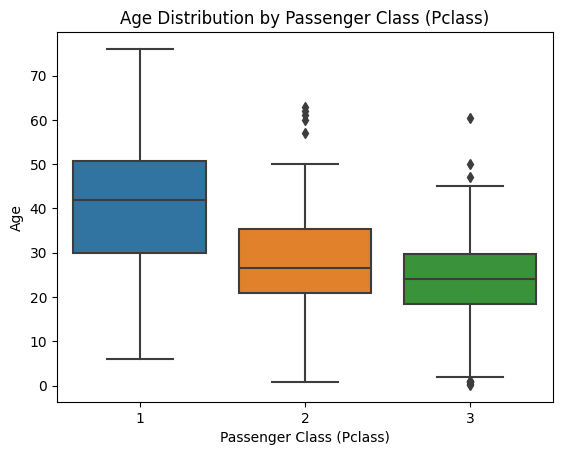

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

# Set labels and title
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class (Pclass)')

# Show the plot
plt.show()


In [ ]:
#Pclass value 1

titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

#Pclass value 2

titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

#Pclass 3

titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

28.7775

In [ ]:
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]



    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()



    else:

        return age

In [ ]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)


<Axes: >

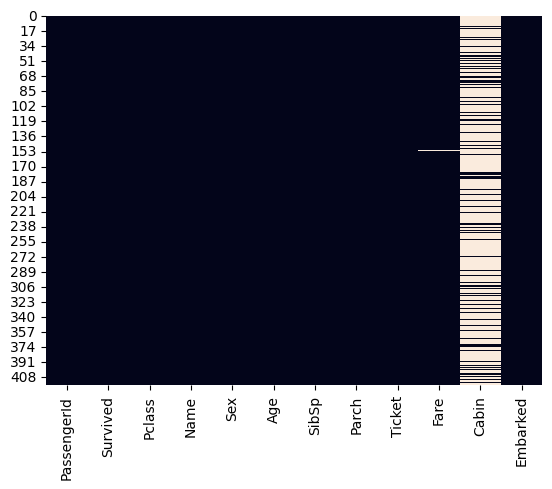

In [ ]:
sns.heatmap(titanic_data.isnull(), cbar=False)

In [ ]:
titanic_data.drop('Cabin', axis=1, inplace = True)

In [ ]:
titanic_data.dropna(inplace = True)

In [ ]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [ ]:
pd.get_dummies(titanic_data['Sex'], drop_first = True)

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [ ]:
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [ ]:
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)

In [ ]:
titanic_data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)


In [ ]:
y_data = titanic_data['Survived']

x_data = titanic_data.drop('Survived', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_training_data, y_training_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict(x_test_data)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test_data, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        72\n           1       1.00      1.00      1.00        54\n\n    accuracy                           1.00       126\n   macro avg       1.00      1.00      1.00       126\nweighted avg       1.00      1.00      1.00       126\n'

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

[[72  0]
 [ 0 54]]
